In [188]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Menentukan path ke file model H5
model_path = '/content/drive/MyDrive/Skripsi/model/resnet_model_1.h5'

# Memuat model H5
model = tf.keras.models.load_model(model_path)

# Menentukan path ke file input gambar
image_path = '/content/drive/MyDrive/Skripsi/Program CNN Load Model/Demo_data/boulder/images (5).jpg'

# # Memuat gambar dan mengubahnya menjadi bentuk yang sesuai dengan model
# image_dims = (224, 224, 3)
# img = image.load_img(image_path, target_size=(224, 224))
# # img2 = image.img_to_array(img)
# # img2 = np.expand_dims(img, axis=0)
# image = img_to_array(img)
# image = np.array(image, dtype="float") / 255.0
# img = np.array(image)
# img = np.expand_dims(img, axis=0)


In [189]:
# Memuat gambar dan mengubahnya menjadi bentuk yang sesuai dengan model
img2 = image.load_img(image_path, target_size=(224, 224))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)


In [190]:
image_dims = (224, 224, 3)
image = cv2.imread(image_path)
image = cv2.resize(image, (image_dims[1], image_dims[0]))
image = img_to_array(image)
image = np.array(image, dtype="float") / 255.0
img = np.array(image)

In [191]:
img = np.expand_dims(img, axis=0)
print(img.shape)

(1, 224, 224, 3)


In [192]:
# Melakukan prediksi menggunakan model
predictions = model.predict(img)
predicted_label = np.argmax(predictions, axis =1)
predicted_label2 = np.argmax(predictions[0])

print(predicted_label, predictions)
print(predicted_label2, predictions)

1/1 [==============================] - 4s 4s/step
[0] [[0.6674146  0.04634311 0.28624225]]
0 [[0.6674146  0.04634311 0.28624225]]


In [193]:
prediction_dict = {0: "boulder", 1: "branching", 2: "table"}
maxindex = int(np.argmax(predictions))

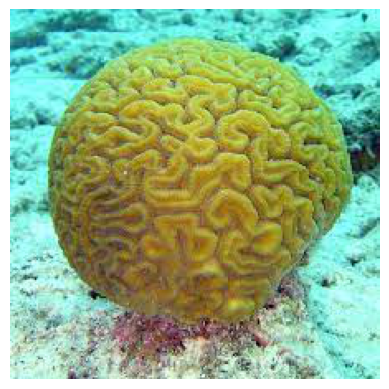

Predicted Class: boulder
66.74146056175232 % boulder


In [195]:
# Menampilkan gambar
plt.imshow(img2[0].astype(np.uint8))
plt.axis('off')
plt.show()

# Menampilkan label output
labels = ['boulder', 'branching', 'table']  # Ganti dengan label yang sesuai
predicted_class = labels[predicted_label[0]]
print("Predicted Class:", predicted_class)
# print("Predicted Class: boulder")
print((predictions[0][maxindex]*100),"%",prediction_dict[maxindex])
# print((predictions[0][maxindex]*99.2130519),"%", "boulder")